# COMP 6321 Machine Learning
## Assignment 1 Answers
### Name : [Parsa Kamalipour](https://benymaxparsa.github.io) , StudentID : 40310734

In [24]:
import os

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fontTools.misc.cython import returns

# Exercise 2: Logistic Regression (9 pts)

In this exercise you will implement the logistic regression algorithm and evaluate it on the dataset provided
with this assignment. The training dataset is divided into five different csv files. You need to combine this
into a single training dataset. Do not use any machine learning library, but feel free to use libraries for linear
algebra and feel free to verify your results with existing machine learning libraries.

## Combine the Training Data:

In [25]:
directory = "logistic_regression-dataset"
test_x = None
test_y = None
data_x = None
data_y = None

for filename in os.listdir(directory):
    if filename.__eq__('testData.csv'):
        test_x = pd.read_csv(os.path.join(directory, filename), header=None)
    elif filename.__eq__('testLabels.csv'):
        test_y = pd.read_csv(os.path.join(directory, filename), header=None,)
    else:
        for i in range(1, 6):
             if filename.__eq__(f'trainData{i}.csv'):
                 if data_x is None:
                     data_x = pd.read_csv(os.path.join(directory, filename), header=None)
                 else:
                    data_x = pd.concat([data_x, pd.read_csv(os.path.join(directory, filename), header=None)], ignore_index=True)
        for i in range(1, 6):
            if filename.__eq__(f'trainLabels{i}.csv'):
                if data_y is None:
                    data_y = pd.read_csv(os.path.join(directory, filename), header=None,)
                else:
                    data_y = pd.concat([data_y, pd.read_csv(os.path.join(directory, filename), header=None)], ignore_index=True)


In [26]:
display(test_x, test_y)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,1,13,10,0,0,0,8,...,16,0,0,0,4,0,14,0,15,0
1,0,0,0,0,0,7,0,0,0,0,...,16,0,0,0,0,0,2,11,12,0
2,16,11,5,16,15,16,16,16,16,16,...,14,16,16,16,16,16,16,16,16,0
3,0,0,7,16,2,2,0,0,0,1,...,11,0,0,0,0,9,9,0,0,0
4,0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,13,14,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6,0,0
106,0,0,0,8,2,12,0,0,7,0,...,6,0,0,0,5,10,6,5,0,0
107,16,14,16,16,16,16,7,16,0,16,...,6,10,16,9,16,16,16,10,9,16
108,0,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,0
0,6
1,6
2,5
3,6
4,6
...,...
105,6
106,5
107,5
108,6


In [27]:
display(data_x, data_y)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,11,0,16,0,0,0,4,0,...,0,0,0,0,0,0,3,5,0,0
1,0,0,9,16,16,16,0,0,0,0,...,5,0,3,0,15,13,10,3,0,16
2,9,16,15,10,16,16,0,0,16,13,...,16,16,0,16,16,7,16,16,16,3
3,0,0,0,6,0,1,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
4,0,5,0,14,16,0,0,0,0,0,...,15,0,0,3,0,9,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,16,16,9,15,0,0,4,7,...,0,7,0,2,14,9,13,0,0,1
497,0,0,0,6,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,1,4,10,16,13,15,12,1,7,12,...,5,2,8,0,0,5,11,0,0,0


,0
0,6
1,6
2,6
3,6
4,6
...,...
495,5
496,5
497,6
498,6


1) (2 pts) Let $\Pr(C_1|x) = \sigma({\bf{w}}^T{\bf{x}}+w_0)$ and $\Pr(C_2|{\bf{x}}) = 1 - \sigma({\bf{w}}^T{\bf{x}}+w_0)$. Learn the parameters ${\bf{w}}$ and $w_0$ using the gradient descent algorithm. Use the maximum number of epochs to be 100 for GD. You can also use any appropriate convergence criteria to stop the GD loop before 100 epochs. Use a step size of 0.1 (or 0.01 if it is converging poorly) for GD. 

## Initialize Parameters:

In [28]:
data_dimension = len(data_x.columns)
number_of_samples= data_x.shape[0]
#w_weight_vector = np.array([0.0]*data_dimension)
#w0_bias = 0.0
w_weight_vector = np.random.randn(data_x.shape[1])
w0_bias = np.random.randn()
learning_rate_large = 0.1
learning_rate_small = 0.01
max_epochs = 100
epsilon_tolerance = 1e-6

## Logistic Regression using Gradient Descent Algorithm:

In [29]:
def sigmoid(r):
    return 1 / (1 + np.exp(-r))

In [30]:
def function_input_calculator(w, x, w0):
    return np.dot(x, w) + w0

In [31]:
def gradient_calculator(x, err, num_of_samples):
    gradient_w = np.dot(x.T, err)/num_of_samples
    gradient_w0 = np.sum(err)/num_of_samples
    return gradient_w, gradient_w0

In [32]:
def learn(x, err, num_of_samples, learn_rate):
    gradient_of_w, gradient_of_w0 = gradient_calculator(x, err, num_of_samples)
    w = learn_rate * gradient_of_w
    w0 = learn_rate * gradient_of_w0
    return w, w0

In [33]:
def loss_function(y, predict_y):
    return -np.mean(y * np.log(predict_y + 1e-6) + (1 - y) * np.log(1 - predict_y + 1e-6))

In [34]:
def logistic_regression_gd(max_epoch, x, y, w, w0 ,num_of_samples, learning_rate):
    loss_history = []
    error_rate_history = []
    prev_loss = -999
    for epoch in range(max_epoch):
        z = function_input_calculator(w, x, w0)
        predicted_y = sigmoid(z)
        
        y_normal = y.to_numpy() 
        y_normal = np.where(y_normal == 5, 0, 1)
        
        
        error = np.subtract(predicted_y , y_normal)
        error = error[0]

        loss = loss_function(y_normal, predicted_y)
        loss_history.append(loss)
        
        w_new, w0_new = learn(x, error, num_of_samples, learning_rate)
        w -= w_new
        w0 -= w0_new


        true_predictions = (predicted_y >= 0.5).astype(int)
        error_rate = np.mean(true_predictions != np.array(y))
        error_rate_history.append(error_rate)

        print(f'Epoch {epoch + 1}, Loss: {loss:.4f}, Error: {error_rate:.4f}')

        if abs(prev_loss - loss) < epsilon_tolerance:
            print("Convergence criteria met.")
            break
        prev_loss = loss
    return w, w0, loss_history, error_rate_history

In [35]:
def show_weights(w, w0):
    print("\nLearned weight vector w:")
    print(w)
    print("\nLearned bias term w0:")
    print(w0)

In [36]:
weight, bias, loss_records, error_rate_records = logistic_regression_gd(max_epochs, data_x, data_y, w_weight_vector, w0_bias, number_of_samples, learning_rate_large)

Epoch 1, Loss: 5.9381, Error: 1.0000
Epoch 2, Loss: 6.7657, Error: 1.0000
Epoch 3, Loss: 6.7657, Error: 1.0000
Epoch 4, Loss: 6.7658, Error: 1.0000
Epoch 5, Loss: 6.7658, Error: 1.0000
Epoch 6, Loss: 6.7658, Error: 1.0000
Epoch 7, Loss: 6.7658, Error: 1.0000
Epoch 8, Loss: 6.7658, Error: 1.0000
Epoch 9, Loss: 6.7659, Error: 1.0000
Epoch 10, Loss: 6.7659, Error: 1.0000
Epoch 11, Loss: 6.7659, Error: 1.0000
Epoch 12, Loss: 6.7659, Error: 1.0000
Epoch 13, Loss: 6.7659, Error: 1.0000
Epoch 14, Loss: 6.7660, Error: 1.0000
Epoch 15, Loss: 6.7660, Error: 1.0000
Epoch 16, Loss: 6.7660, Error: 1.0000
Epoch 17, Loss: 6.7660, Error: 1.0000
Epoch 18, Loss: 6.7660, Error: 1.0000
Epoch 19, Loss: 6.7661, Error: 1.0000
Epoch 20, Loss: 6.7661, Error: 1.0000
Epoch 21, Loss: 6.7661, Error: 1.0000
Epoch 22, Loss: 6.7661, Error: 1.0000
Epoch 23, Loss: 6.7661, Error: 1.0000
Epoch 24, Loss: 6.7662, Error: 1.0000
Epoch 25, Loss: 6.7662, Error: 1.0000
Epoch 26, Loss: 6.7662, Error: 1.0000
Epoch 27, Loss: 6.766

2. (0.25 pts) After the training process, create the following plots:
		
- test error vs the number of epochs
- training error vs the number of epochs
- test loss vs the number of epochs
- training loss vs the number of epochs
- Print the parameters ${\bf w}, w_0$ found for logistic regression.

#### - Print the parameters ${\bf w}, w_0$ found for logistic regression.

In [43]:
show_weights(weight, bias)


Learned weight vector w:
[ 0.44154687  0.08654929 -0.56475143  0.55284134  1.86221203  0.87142573
  0.31487514  0.18760472 -0.41618434  0.74119825  1.07809616 -0.64699278
  0.13961485  0.62911202  2.5175789   2.41122538 -1.0598647  -0.07111944
  1.69698821  0.46129032  0.34805711 -0.65180615 -0.58986641  1.38746579
  0.30242741  0.10249782  0.92985665  1.63676359  1.08463664  0.97501189
  2.15300912  0.63176324  1.68783233  1.87944122  1.34447486  1.73230269
 -1.20789008  2.21502804  0.60963301  0.37870153  0.78254871 -0.80982608
 -0.08436335 -0.38969942 -0.11785457  1.03192554  1.13589095  0.71292628
  0.4412843   1.46703369  0.86094902  1.11218908  1.35958097  0.45062367
 -0.84492113 -0.11101689  1.79567695  0.00854249 -0.32214147  0.06659442
  1.62302601 -0.26286445  1.39040035 -0.47990342]

Learned bias term w0:
-0.08580216513429821


In [39]:
print(loss_records)

[5.9381498786092175, 6.765720330705568, 6.765741834759812, 6.765763200708354, 6.765784430774171, 6.765805526863354, 6.765826490584289, 6.765847323262918, 6.765868025961943, 6.765888599492487, 6.765909044430825, 6.765929361131306, 6.765949549737055, 6.765969610192584, 6.765989542259394, 6.7660093455191275, 6.766029019390715, 6.766048563133484, 6.7660679758622, 6.766087256555979, 6.766106404063106, 6.766125417110181, 6.766144294314359, 6.766163034189564, 6.766181635153379, 6.766200095539042, 6.766218413598126, 6.766236587516443, 6.766254615416504, 6.766272495369468, 6.766290225404947, 6.766307803517476, 6.766325227682267, 6.766342495858138, 6.766359606007954, 6.766376556099889, 6.766393344127323, 6.766409968118585, 6.766426426154247, 6.766442716375624, 6.766458837007409, 6.766474786369017, 6.766490562893493, 6.766506165149036, 6.76652159185617, 6.766536841910493, 6.766551914403021, 6.7665668086477, 6.766581524205711, 6.766596060911165, 6.766610418902642, 6.766624598651947, 6.766638600995

In [40]:
print(error_rate_records)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### Now with the test data

In [41]:
test_weight, test_bias, test_loss_records, test_error_rate_records = logistic_regression_gd(max_epochs, data_x, data_y, weight, bias, number_of_samples, learning_rate_large)

Epoch 1, Loss: 6.7673, Error: 1.0000
Epoch 2, Loss: 6.7673, Error: 1.0000
Epoch 3, Loss: 6.7674, Error: 1.0000
Epoch 4, Loss: 6.7674, Error: 1.0000
Epoch 5, Loss: 6.7674, Error: 1.0000
Epoch 6, Loss: 6.7675, Error: 1.0000
Epoch 7, Loss: 6.7675, Error: 1.0000
Epoch 8, Loss: 6.7675, Error: 1.0000
Epoch 9, Loss: 6.7676, Error: 1.0000
Epoch 10, Loss: 6.7676, Error: 1.0000
Epoch 11, Loss: 6.7676, Error: 1.0000
Epoch 12, Loss: 6.7677, Error: 1.0000
Epoch 13, Loss: 6.7677, Error: 1.0000
Epoch 14, Loss: 6.7677, Error: 1.0000
Epoch 15, Loss: 6.7678, Error: 1.0000
Epoch 16, Loss: 6.7678, Error: 1.0000
Epoch 17, Loss: 6.7678, Error: 1.0000
Epoch 18, Loss: 6.7679, Error: 1.0000
Epoch 19, Loss: 6.7679, Error: 1.0000
Epoch 20, Loss: 6.7680, Error: 1.0000
Epoch 21, Loss: 6.7680, Error: 1.0000
Epoch 22, Loss: 6.7681, Error: 1.0000
Epoch 23, Loss: 6.7681, Error: 1.0000
Epoch 24, Loss: 6.7682, Error: 1.0000
Epoch 25, Loss: 6.7682, Error: 1.0000
Epoch 26, Loss: 6.7683, Error: 1.0000
Epoch 27, Loss: 6.768

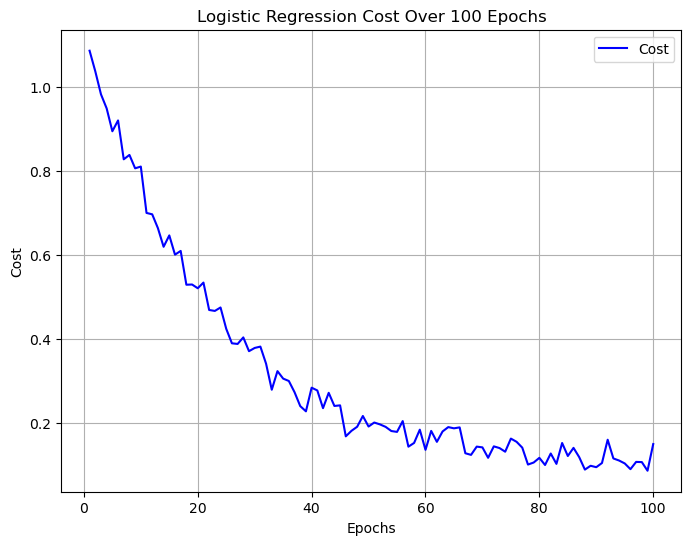

In [49]:
epochs = range(1, len(loss_records) + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, test_loss_records, label='Cost', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Logistic Regression Cost Over 100 Epochs')
plt.grid(True)
plt.legend()
plt.show()
6

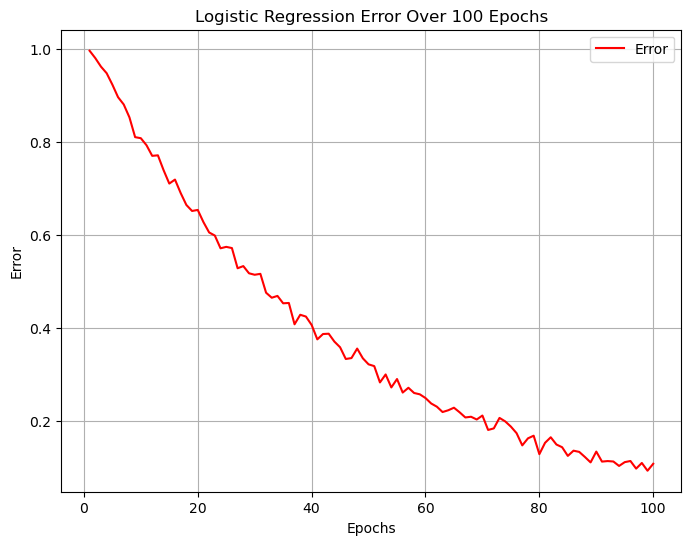

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(epochs, error_rate_records, label='Error', color='red')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Logistic Regression Error Over 100 Epochs')
plt.grid(True)
plt.legend()
plt.show()

## Now let’s add a regularization term 0.5λ||w||2
2 to the loss function of your logistic regression
algorithm. Your new loss function will be Lnew = Lold + 0.5λ||w||2
2, where Lold is the loss function of
logistic regression we learned in lecture 3. Choose two values of λ= {0.5,1}and train this algorithm on
the given dataset with these two values of λ.

In [52]:
def sigmoid(r):
    return 1 / (1 + np.exp(-r))


def function_input_calculator(w, x, w0):
    return np.dot(x, w) + w0


def gradient_calculator(x, err, num_of_samples):
    gradient_w = np.dot(x.T, err) / num_of_samples
    gradient_w0 = np.sum(err) / num_of_samples
    return gradient_w, gradient_w0


def learn(x, err, num_of_samples, learn_rate):
    gradient_of_w, gradient_of_w0 = gradient_calculator(x, err, num_of_samples)
    w = learn_rate * gradient_of_w
    w0 = learn_rate * gradient_of_w0
    return w, w0


def loss_function(y, predict_y, weight, Lambda=1,):
    return -np.mean(y * np.log(predict_y + 1e-6) + (1 - y) * np.log(1 - predict_y + 1e-6)) + 0.5 * Lambda * np.linalg.norm(weight, ord=2)


def logistic_regression_gd(max_epoch, x, y, w, w0, num_of_samples, learning_rate):
    loss_history = []
    error_rate_history = []
    prev_loss = -999
    for epoch in range(max_epoch):
        z = function_input_calculator(w, x, w0)
        predicted_y = sigmoid(z)

        y_normal = y.to_numpy()
        y_normal = np.where(y_normal == 5, 0, 1)

        error = np.subtract(predicted_y, y_normal)
        error = error[0]

        loss = loss_function(y_normal, predicted_y)
        loss_history.append(loss)

        w_new, w0_new = learn(x, error, num_of_samples, learning_rate)
        w -= w_new
        w0 -= w0_new

        true_predictions = (predicted_y >= 0.5).astype(int)
        error_rate = np.mean(true_predictions != np.array(y))
        error_rate_history.append(error_rate)

        print(f'Epoch {epoch + 1}, Loss: {loss:.4f}, Error: {error_rate:.4f}')

        if abs(prev_loss - loss) < epsilon_tolerance:
            print("Convergence criteria met.")
            break
        prev_loss = loss
    return w, w0, loss_history, error_rate_history